After Having demonstrated AdaBoost.
Next Move on to Gradient Boost.
https://youtu.be/3CC4N4z3GJc Check out this video link to get the basic idea of the GBoost.

In this notebook I am going to demonstrate the learned aspects of GBoost.
I am going to dissect and cut open, so that we develop a thorough understanding.


What is GBoost?
1)Gboost is iterative algorithm, that improves the weak predictor to make it the strong one.
2)Similar to adaboost but all the weak learners are weighed alike. 
3)Unlike adaboost the accuracy of the model incrreases with each iteration


What we gonna do?
1)Plot the performance of model against n_estimators.
2)Plot the performance of model against tree depth.
3)Check whether loss is getting reduced each iteration or not.

We will use the Titanic Dataset.

In [210]:
import pandas as pd
import numpy as np


In [211]:
df_train=pd.read_csv("C:/Users/adity/OneDrive/Desktop/Analytics Vidya/Titanic/train.csv")
df_test=pd.read_csv("C:/Users/adity/OneDrive/Desktop/Analytics Vidya/Titanic/test.csv")


In [212]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
df_train.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)
df_test.drop(['PassengerId','Ticket','Name'], axis=1, inplace=True)


In [214]:
df_train.dropna(axis=0, how='any' ,inplace=True)
df_test.dropna(axis=0, how='any' ,inplace=True)
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [215]:
df_train['Cabin'].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7',
       'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49',
       'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16',
       'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49',
       'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8',
       'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', 'D6', 'B

In [216]:
len(df_train)

183

In [217]:
df_train['Cabin']=df_train['Cabin'].apply(lambda x:list(x)[0])
df_test['Cabin']=df_test['Cabin'].apply(lambda x:list(x)[0])


In [218]:
df_train.columns

Index(['index', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [219]:
df_train.dtypes

index         int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [220]:
df_train.isnull().sum()

index       0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [221]:
dfT1=df_train[['Pclass', 'Age','Parch'] ]
dfT2=pd.get_dummies(df_train['Pclass'])
dfT3=pd.get_dummies(df_train['Sex'])
dfT4=pd.get_dummies(df_train['Cabin'])
dfT5=pd.get_dummies(df_train['Embarked'])


test1=df_train[['Survived','Pclass', 'Age','Parch'] ]
test2=pd.get_dummies(df_train['Pclass'])
test3=pd.get_dummies(df_train['Sex'])
test4=pd.get_dummies(df_train['Cabin'])
test5=pd.get_dummies(df_train['Embarked'])

train_new=pd.concat([dfT1,dfT2,dfT3,dfT4,dfT5], axis=1)
test_new=pd.concat([test1,test2,test3,test4,test5], axis=1)


train_new.rename(columns={1: "pclass1", 2: "pclass2",3:"pclass3"}, inplace=True)
test_new.rename(columns={1: "pclass1", 2: "pclass2",3:"pclass3"},inplace=True)


In [222]:
X=train_new
y=np.asarray(df_train[['Survived']])


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error



In [225]:
lr_list=[0.1,1,2,4,8,10,15,20,25,30]
mse_list=[]
acc_list=[]
base_est = DecisionTreeClassifier(max_depth=1)


for lr in lr_list:
    model = GradientBoostingClassifier(n_estimators=100, init=base_est, max_features=19, max_depth=2, 
                                   learning_rate=lr)
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_pred, np.asarray(y_test))
    acc=model.score(X_test, y_test)
    mse_list.append(mse)
    acc_list.append(acc)
    print("Learning Rate %1.1f, Mean Squared Error %1.2f, Accuracy %1.2f" %(lr,mse,acc))
    

Learning Rate 0.1, Mean Squared Error 0.24, Accuracy 0.76
Learning Rate 1.0, Mean Squared Error 0.32, Accuracy 0.68
Learning Rate 2.0, Mean Squared Error 0.35, Accuracy 0.65
Learning Rate 4.0, Mean Squared Error 0.38, Accuracy 0.62
Learning Rate 8.0, Mean Squared Error 0.46, Accuracy 0.54
Learning Rate 10.0, Mean Squared Error 0.46, Accuracy 0.54
Learning Rate 15.0, Mean Squared Error 0.22, Accuracy 0.78
Learning Rate 20.0, Mean Squared Error 0.43, Accuracy 0.57
Learning Rate 25.0, Mean Squared Error 0.62, Accuracy 0.38
Learning Rate 30.0, Mean Squared Error 0.62, Accuracy 0.38


In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, 'learning rate'), Text(0, 0.5, 'Accuracy')]

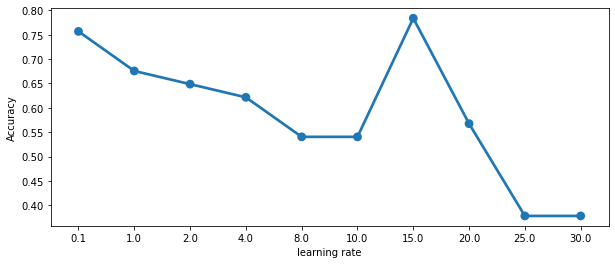

In [229]:
plt.figure(figsize=(10,4))
ax=sns.pointplot(x=lr_list, y=acc_list)
ax.set(xlabel='learning rate', ylabel='Accuracy')

Very low learning rate may cause to be stuck in local minima, no convergence may happen.
Very high learning rate will result in oscillations back and forth.
Hence choose an optimum learning rate.

In [230]:
est_list=[50,75,100,125,150,175,190,200,215,230]
mse_list=[]
acc_list=[]
base_est = DecisionTreeClassifier(max_depth=1)


for est in est_list:
    model = GradientBoostingClassifier(n_estimators=est, init=base_est, max_features=19, max_depth=2, 
                                   learning_rate=0.1)
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_pred, np.asarray(y_test))
    acc=model.score(X_test, y_test)
    mse_list.append(mse)
    acc_list.append(acc)
    print("Estimators %1.1f, Mean Squared Error %1.2f, Accuracy %1.2f" %(est,mse,acc))

Estimators 50.0, Mean Squared Error 0.27, Accuracy 0.73
Estimators 75.0, Mean Squared Error 0.27, Accuracy 0.73
Estimators 100.0, Mean Squared Error 0.24, Accuracy 0.76
Estimators 125.0, Mean Squared Error 0.24, Accuracy 0.76
Estimators 150.0, Mean Squared Error 0.24, Accuracy 0.76
Estimators 175.0, Mean Squared Error 0.30, Accuracy 0.70
Estimators 190.0, Mean Squared Error 0.30, Accuracy 0.70
Estimators 200.0, Mean Squared Error 0.30, Accuracy 0.70
Estimators 215.0, Mean Squared Error 0.27, Accuracy 0.73
Estimators 230.0, Mean Squared Error 0.27, Accuracy 0.73


[Text(0.5, 0, 'N Estimators'), Text(0, 0.5, 'Accuracy')]

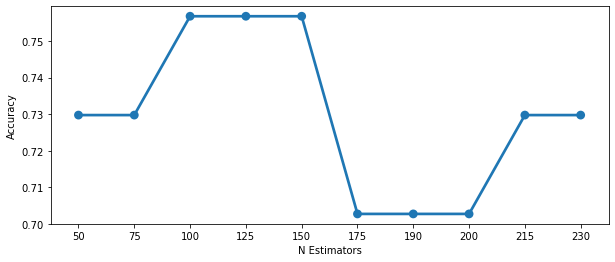

In [231]:
plt.figure(figsize=(10,4))
ax=sns.pointplot(x=est_list,y=acc_list)
ax.set(xlabel='N Estimators', ylabel='Accuracy')

The number of estimators is number of iterations the algorithm will use.
Too many classifiers will overfit the data and poor performance against validation data.
Here we will go with estimator size of 100


In [234]:
dpt_list=[1,2,4,6,8,10,12,14,16,18,20]
mse_list=[]
acc_list=[]
 


for dpt in dpt_list:
    model = GradientBoostingClassifier(n_estimators=100, init=DecisionTreeClassifier(max_depth=dpt), max_features=19, max_depth=dpt, 
                                   learning_rate=0.1)
    model.fit(X_train,y_train.ravel())
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_pred, np.asarray(y_test))
    acc=model.score(X_test, y_test)
    mse_list.append(mse)
    acc_list.append(acc)
    print("Tree depth %d, Mean Squared Error %1.2f, Accuracy %1.2f" %(dpt,mse,acc))

Tree depth 1, Mean Squared Error 0.27, Accuracy 0.73
Tree depth 2, Mean Squared Error 0.24, Accuracy 0.76
Tree depth 4, Mean Squared Error 0.32, Accuracy 0.68
Tree depth 6, Mean Squared Error 0.32, Accuracy 0.68
Tree depth 8, Mean Squared Error 0.38, Accuracy 0.62
Tree depth 10, Mean Squared Error 0.32, Accuracy 0.68
Tree depth 12, Mean Squared Error 0.30, Accuracy 0.70
Tree depth 14, Mean Squared Error 0.30, Accuracy 0.70
Tree depth 16, Mean Squared Error 0.27, Accuracy 0.73
Tree depth 18, Mean Squared Error 0.30, Accuracy 0.70
Tree depth 20, Mean Squared Error 0.27, Accuracy 0.73


[Text(0.5, 0, 'Tree Depth'), Text(0, 0.5, 'Accuracy')]

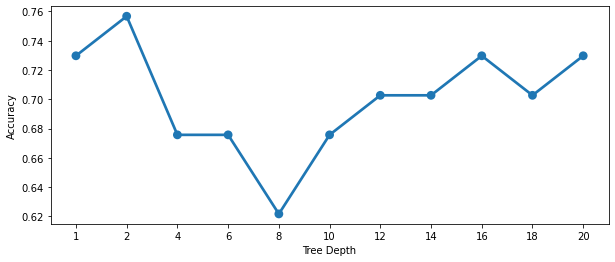

In [235]:
plt.figure(figsize=(10,4))
ax=sns.pointplot(x=dpt_list, y=acc_list)
ax.set(xlabel="Tree Depth", ylabel='Accuracy')

Deeper trees tend to overfit.
For this model tree depth of 2 is enough.

In [236]:
tree_model=GradientBoostingClassifier(n_estimators=100, init=DecisionTreeClassifier(max_depth=4), max_features=19, max_depth=2, 
                                   learning_rate=0.1)
tree_model.fit(X_train, y_train.ravel())
tree_model.score(X_test, y_test)

0.8108108108108109

One can check the individual classifiers as well.
One can also plot the trees to know their numerical particulars.

In [241]:
tree_model.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=RandomState(MT19937) at 0x2056B827540)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=RandomState(MT19937) at 0x2056B827540)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=RandomState(MT19937) at 0x2056B827540)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=RandomState(MT19937) at 0x2056B827540)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=RandomState(MT19937) at 0x2056B827540)    ],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=2, max_features=19,
                              random_state=R

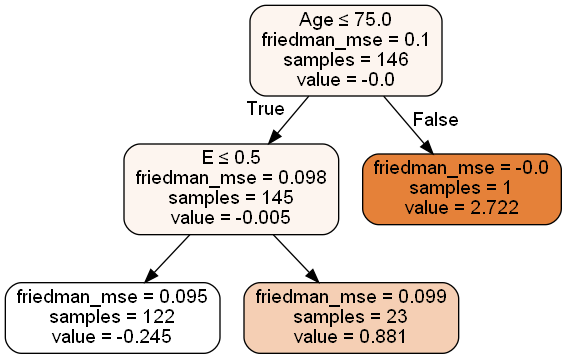

In [243]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Digraph

sub_tree = tree_model.estimators_[2, 0]
dot_data = export_graphviz(
    sub_tree,feature_names=X_train.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

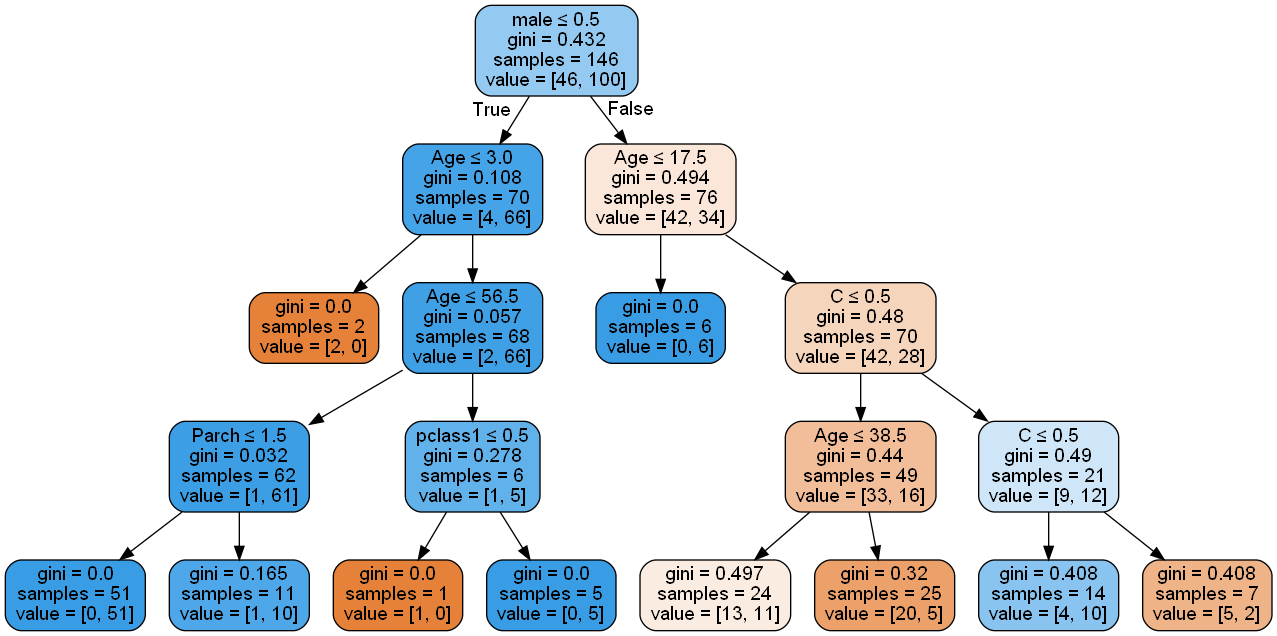

In [244]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from graphviz import Digraph


dot_data = export_graphviz(
    tree_model.init_,feature_names=X_train.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

Notice the difference between above tree plots, the first plot is of estimators generated by Gboost classifer, has depth of 2.
The second one is that initial estimator we have supplied. Its depth is 4.

By altering the tree depth, the model can be engineered microscopically.

Next in I will demonstrate how tree depth and impurity can influence each other.

In [256]:
tree_model_imp1=GradientBoostingClassifier(n_estimators=100, init=DecisionTreeClassifier(max_depth=4), max_features=19, max_depth=4, 
                                   learning_rate=0.1, min_impurity_decrease=0.0001,subsample=0.9, random_state=45)
tree_model_imp1.fit(X_train, y_train.ravel())
print(tree_model_imp1.score(X_test, y_test))



tree_model_imp2=GradientBoostingClassifier(n_estimators=100, init=DecisionTreeClassifier(max_depth=4), max_features=19, max_depth=4, 
                                  learning_rate=0.1, min_impurity_decrease=0.32,subsample=0.9, random_state=45)
tree_model_imp2.fit(X_train, y_train.ravel())
print(tree_model_imp2.score(X_test, y_test))



0.6756756756756757
0.7297297297297297


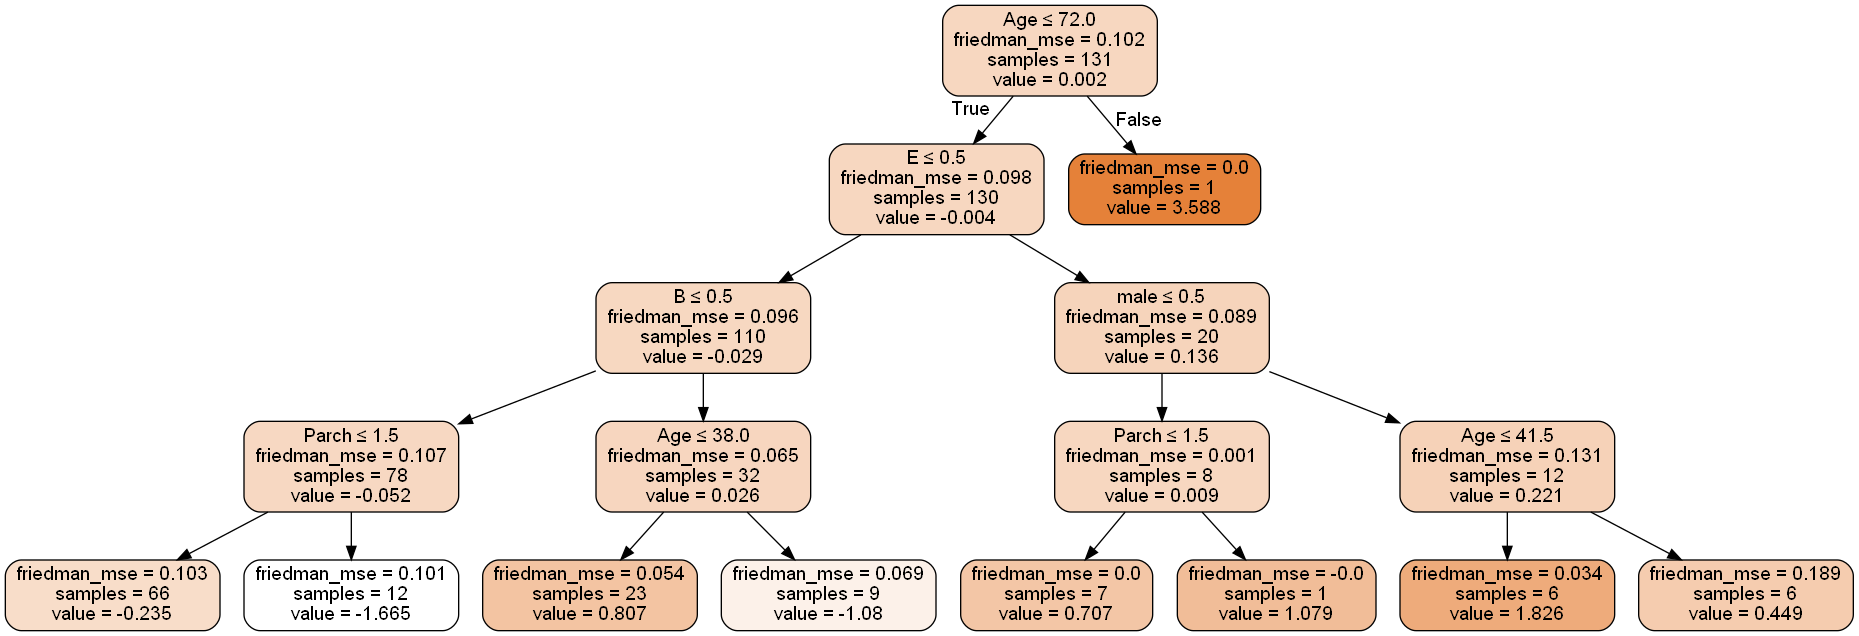

In [257]:
sub_tree_imp1= tree_model_imp1.estimators_[2, 0]

dot_data_imp1 = export_graphviz(
    sub_tree_imp1, feature_names=X_train.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data_imp1)
Image(graph.create_png())

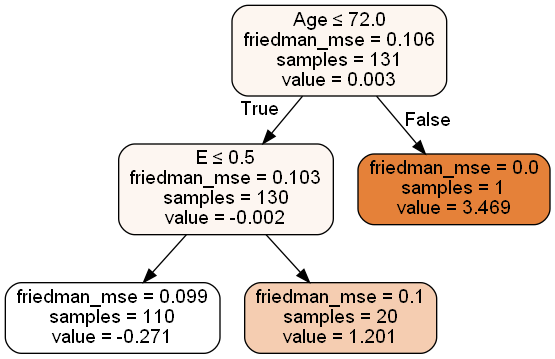

In [258]:
sub_tree_imp2= tree_model_imp2.estimators_[2, 0]

dot_data_imp2 = export_graphviz(
    sub_tree_imp2, feature_names=X_train.columns,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data_imp2)
Image(graph.create_png())

Now what did I do here?
If one sees train_model_imp1 and train_model_imp2 we have used max depths =4, we have already determined that best depth=2.

But if the problem at hand demands deeper trees to account for all features, and it is affecting the models's performance adversely then one can alter the min_impurity_decrease to a higher value. This will set the benchmark for a tree to split.
With this one can have the varied tree depths of individual classifiers. This is again a case of micro-engineering.

As one can see increasing the min_impurity_decrease has reduced the tree split from 4 to 2 and hence upped the accurcay from 0.67 to 0.72.


Decision function is measure of how distant our classifications are from a hyperplane.
The staged decision function is when you observe the performance with each estimators.
Following is Accuracy predicted at each stage for first 20 estimators.

In [259]:
from sklearn.metrics import accuracy_score
stg_pred=list(tree_model_imp1.staged_predict(X_test))

for num in range(0,20):
    print("Staged prediction %d" %(num), accuracy_score(stg_pred[num],y_test))

Staged prediction 0 0.7027027027027027
Staged prediction 1 0.7297297297297297
Staged prediction 2 0.7297297297297297
Staged prediction 3 0.7297297297297297
Staged prediction 4 0.7297297297297297
Staged prediction 5 0.7297297297297297
Staged prediction 6 0.7297297297297297
Staged prediction 7 0.7297297297297297
Staged prediction 8 0.7297297297297297
Staged prediction 9 0.7297297297297297
Staged prediction 10 0.7027027027027027
Staged prediction 11 0.7027027027027027
Staged prediction 12 0.7027027027027027
Staged prediction 13 0.7027027027027027
Staged prediction 14 0.7027027027027027
Staged prediction 15 0.7027027027027027
Staged prediction 16 0.7027027027027027
Staged prediction 17 0.7027027027027027
Staged prediction 18 0.7027027027027027
Staged prediction 19 0.7297297297297297


[Text(0.5, 0, 'Iterators'), Text(0, 0.5, 'Loss value')]

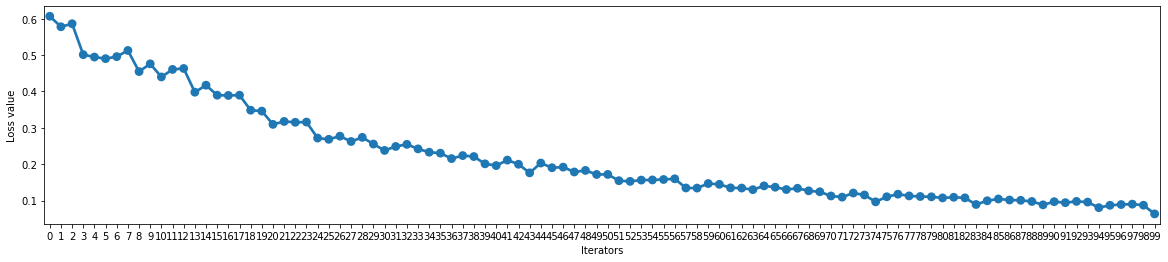

In [265]:
train_score=tree_model_imp1.train_score_
plt.figure(figsize=(20,4))
ax=sns.pointplot(x=np.arange(len(train_score)), y=train_score)
ax.set(xlabel="Iterators", ylabel='Loss value')

Train Score is loss of the model at the 'i'th iteration.
Look at the line plot, the loss is decreasing with each iteration.

This is plot is the summary of Gradient Boost which reduces loss with each ieration.
